In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
df_HR = pd.read_csv("/content/drive/MyDrive/Machine Learning/HR Department/HR_comma_sep.csv")
df_HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Exploratory Data Analysis


In [334]:
df_HR.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [335]:
df_HR["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Axes(0.125,0.11;0.775x0.77)


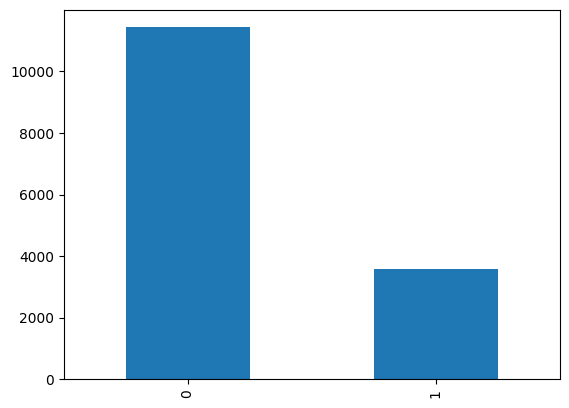

In [336]:
print(df_HR['left'].value_counts().plot(kind='bar'))

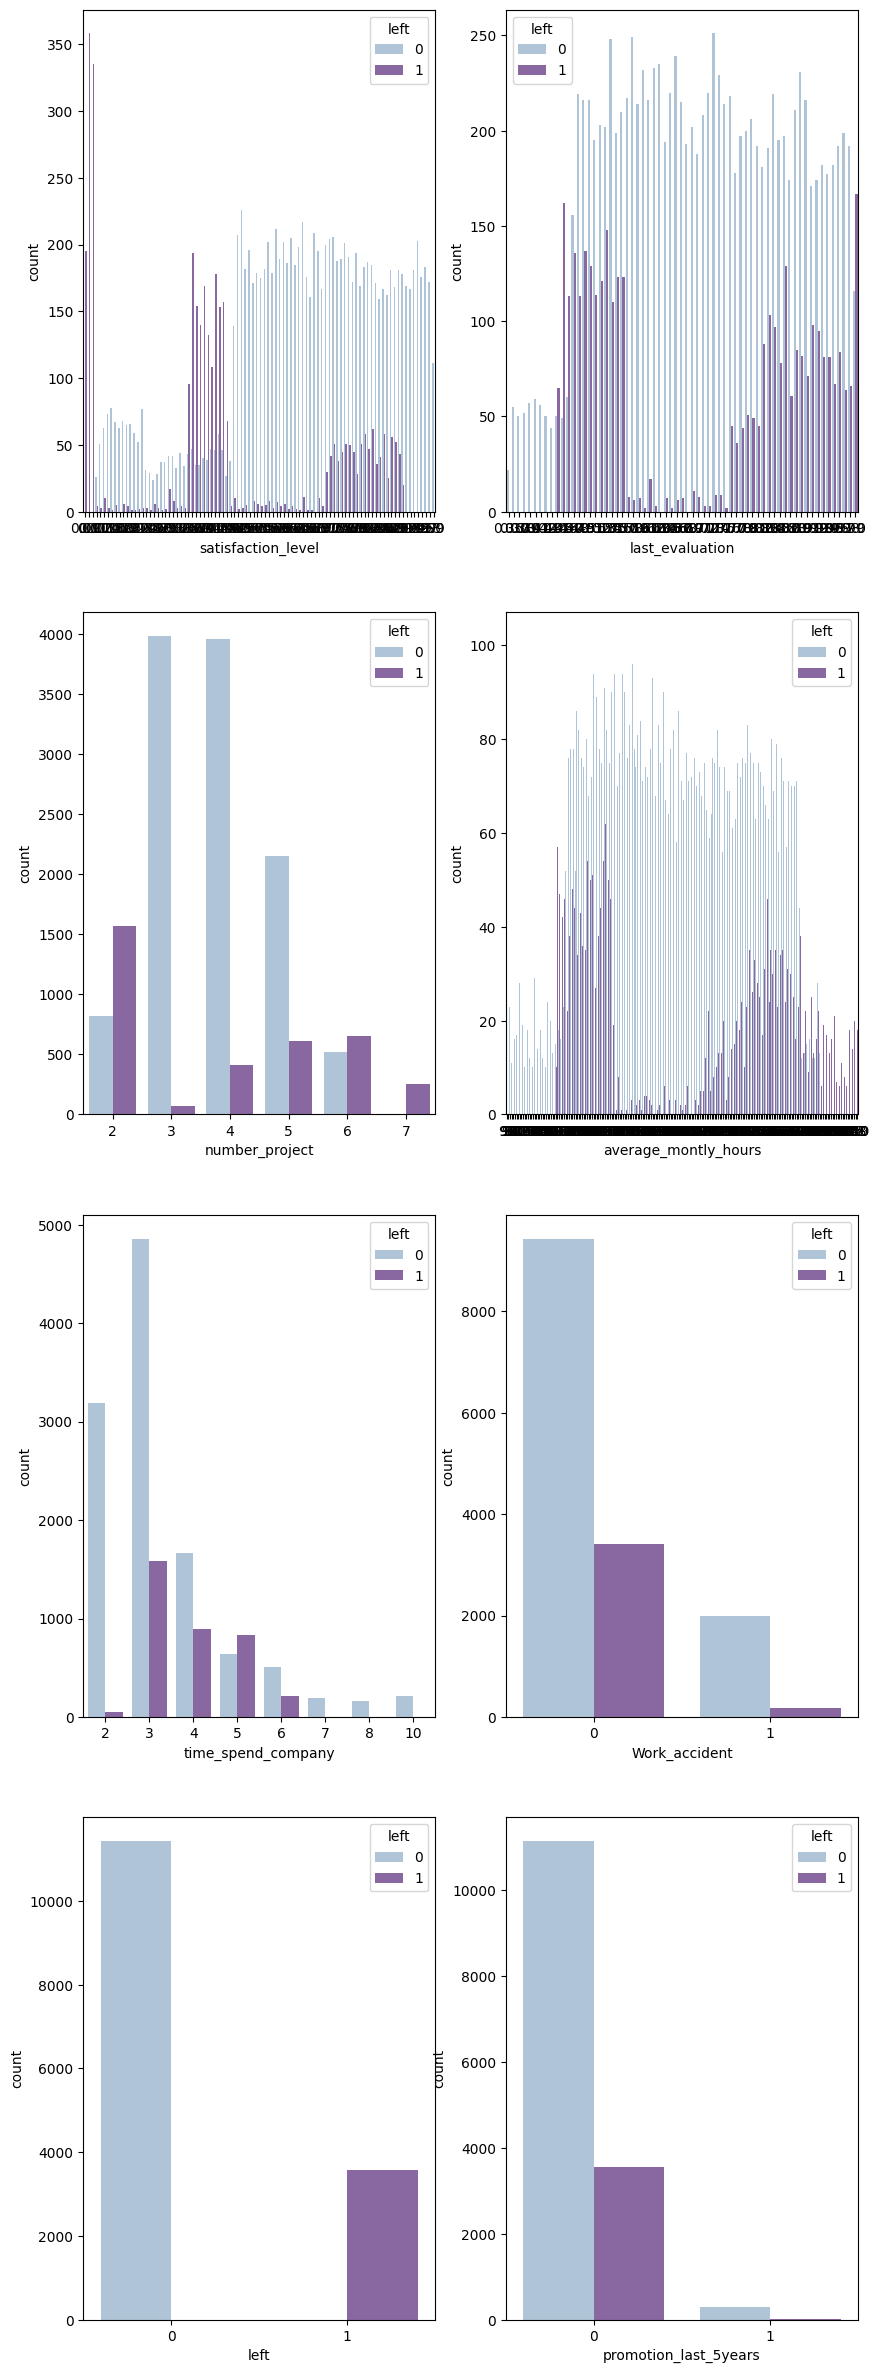

In [337]:
fig, ax = plt.subplots(4, 2, figsize=(10, 30))

# iterate over column names
for col, subplot in zip(df_HR.columns, ax.flatten()):
    sns.countplot(data=df_HR, x=col, hue='left', ax=subplot, palette='BuPu')

plt.show()


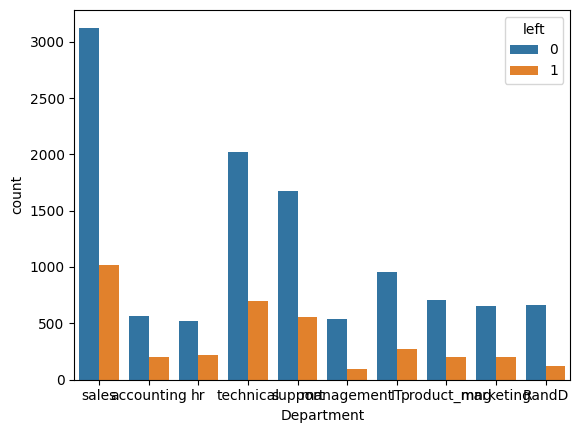

In [338]:
sns.countplot(data=df_HR, x="Department", hue='left')

plt.show()


In [339]:
print(df_HR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [340]:
print((df_HR.isnull().sum()))

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [341]:
for i in df_HR.columns:
    print({i:df_HR[i].unique()})

{'satisfaction_level': array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])}
{'last_evaluation': array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63,

In [342]:
colname=[]
for x in df_HR.columns:
    if df_HR[x].dtype == 'object':
        colname.append(x)
print(colname)

['Department', 'salary']


In [343]:
df_HR.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [344]:
df_HR = df_HR[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]

In [345]:
df_HR.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [346]:
dummies = pd.get_dummies(df_HR['salary'])
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [347]:
df_HR = pd.concat([df_HR.drop(columns='salary'), dummies], axis='columns')
df_HR.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low,medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


In [348]:
X = df_HR.drop(columns='left')
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [349]:
y = df_HR['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [350]:
Y.shape

(14999,)

In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [352]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8999, 6)
(8999,)
(6000, 6)
(6000,)


Logistic Classifier


In [353]:
# BUILDING MODEL
from sklearn.linear_model import LogisticRegression
#create a model object 
classifier=LogisticRegression()
#train the model object
classifier.fit(X_train,y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 1 0 0]


In [354]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred_class))

acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[3765  805]
 [1165  265]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      4570
           1       0.25      0.19      0.21      1430

    accuracy                           0.67      6000
   macro avg       0.51      0.50      0.50      6000
weighted avg       0.64      0.67      0.65      6000

Accuracy of the model:  0.6716666666666666


In [355]:
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.76925876 0.23074124]
 [0.71453068 0.28546932]
 [0.7222554  0.2777446 ]
 ...
 [0.41477491 0.58522509]
 [0.86147899 0.13852101]
 [0.95545808 0.04454192]]


In [356]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.40:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [357]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred_class))

acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[4143  427]
 [ 900  530]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4570
           1       0.55      0.37      0.44      1430

    accuracy                           0.78      6000
   macro avg       0.69      0.64      0.65      6000
weighted avg       0.76      0.78      0.76      6000

Accuracy of the model:  0.7788333333333334


KNN Classifier

In [358]:
# predicting using the Kneighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric='euclidean')

#euclidean, manhatten, minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train, y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(y_test, Y_pred)))

[(0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0),

In [359]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[4415  155]
 [ 964  466]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4570
           1       0.75      0.33      0.45      1430

    accuracy                           0.81      6000
   macro avg       0.79      0.65      0.67      6000
weighted avg       0.80      0.81      0.78      6000

Accuracy of the model:  0.8135


SVM Classifier

In [360]:
from sklearn.svm import SVC
svc_model=SVC(kernel='rbf',C=20,gamma=0.01)#previous c=1,gamma=0.01
svc_model.fit(X_train,y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))


[0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [361]:
svc_model.score(X_train,y_train)

#score -->behind the scene following happens
#Y_pred=svc_model.predict(X_train)
#accuracy_score(Y_train,Y_pred)
#Score accuracy will always be on higher side , always quote 2 to 3 %lesser value to  the client as actual accuracy will also be on the lower side so will quote 75 or76 in our case

0.8693188132014669

In [362]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[4343  227]
 [ 543  887]]
Classification report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4570
           1       0.80      0.62      0.70      1430

    accuracy                           0.87      6000
   macro avg       0.84      0.79      0.81      6000
weighted avg       0.87      0.87      0.87      6000

Accuracy of the model:  0.8716666666666667


Navie Bayes

In [363]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB\

model=MultinomialNB(alpha=1.0)
#Alpha-->value for Laplacian correction method to avoid zero frequency problem
model.fit(X_train, y_train)

Y_pred=model.predict(X_test)

In [364]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[4570    0]
 [1430    0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4570
           1       0.00      0.00      0.00      1430

    accuracy                           0.76      6000
   macro avg       0.38      0.50      0.43      6000
weighted avg       0.58      0.76      0.66      6000

Accuracy of the model:  0.7616666666666667


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier


In [365]:
#predicting using the decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")# PRUNING => min_samples_leaf=2,min_samples_split=5, max_depth=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [366]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[4301  269]
 [ 233 1197]]
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4570
           1       0.82      0.84      0.83      1430

    accuracy                           0.92      6000
   macro avg       0.88      0.89      0.89      6000
weighted avg       0.92      0.92      0.92      6000

Accuracy of the model:  0.9163333333333333


Random Forest Classifier


In [367]:
#predicting using the Random_ForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=100,random_state=10,bootstrap=True,max_features=0.6,n_jobs=-1)#bootstrap True will do sampling with repalcemet#max_feature=auto,sqrt both consider True (subsetting IV)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,y_train)

Y_pred=model_RandomForest.predict(X_test)

In [368]:
model_RandomForest.score(X_train,y_train)

0.9828869874430493

In [369]:
#Evalution matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,Y_pred))

acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[4367  203]
 [ 205 1225]]
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4570
           1       0.86      0.86      0.86      1430

    accuracy                           0.93      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.93      0.93      0.93      6000

Accuracy of the model:  0.932


Conclusion

 We see Random Forest Classifier has the highest Accuracy Score with 93.25% Accuracy and Naive Bayes has the least Accuracy of 76.36%--